In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# --- 1. Data Loading and Initial Inspection ---
# UPDATED FILE NAME: 'Netflix_Dataset.csv'
file_name = "Netflix_Dataset.csv"
try:
    # Load the data, assuming it's in the same directory as the script/notebook
    df = pd.read_csv(file_name)
    print(f"Data loaded successfully from {file_name}")
except FileNotFoundError:
    print(f"ERROR: The file '{file_name}' was not found. Please ensure the CSV file is in the same folder as this notebook.")
    exit()

Data loaded successfully from Netflix_Dataset.csv


In [4]:
# --- 2. Data Preparation and Cleaning ---

# 2.1 Clean 'Release_Date' and create a 'Year' column
# Drop rows with missing Release_Date (minimal loss)
df.dropna(subset=['Release_Date'], inplace=True)
# Convert 'Release_Date' to datetime, handling inconsistent formats and errors
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce', format='mixed')
# Drop rows where Release_Date could not be parsed (became NaT)
df.dropna(subset=['Release_Date'], inplace=True)
df['Year'] = df['Release_Date'].dt.year.astype(int)
print("Year column created and Release_Date cleaned.")

Year column created and Release_Date cleaned.


Chart 1: 'chart1_content_trend.png' saved.


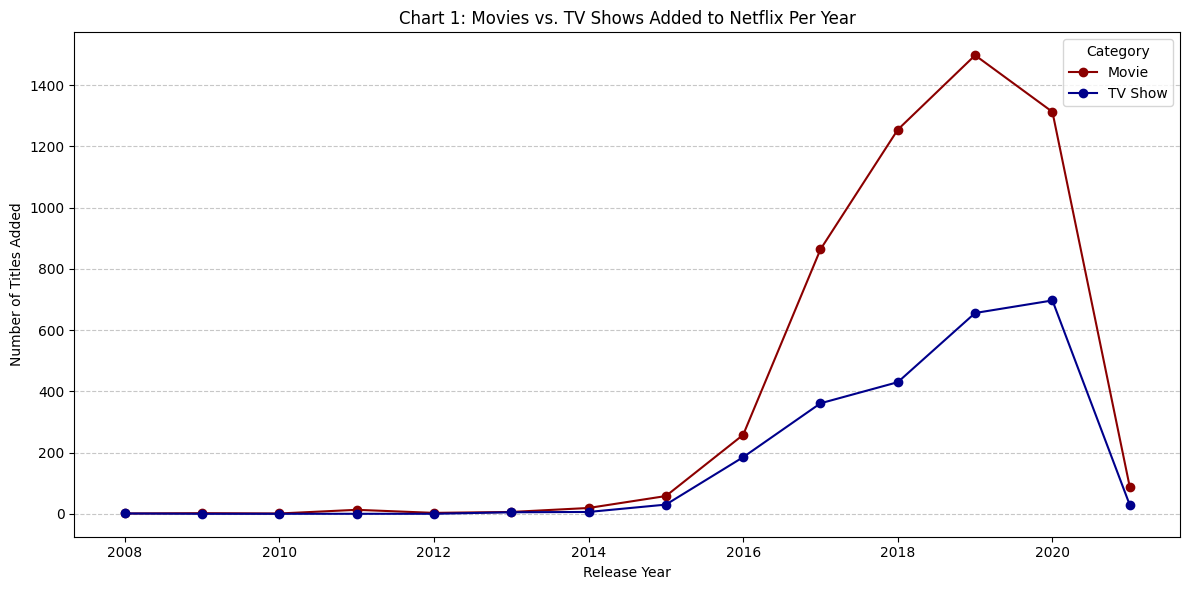

In [5]:
# --- 3. Result 1 (Chart 1): Content Trend Analysis (Movies vs. TV Shows by Year) ---
# Objective: Analyze the distribution of Movies vs. TV Shows over the years.
content_by_year = df.groupby(['Year', 'Category']).size().unstack(fill_value=0)
# Filter for years 2008 onwards for a clearer trend display
content_by_year = content_by_year[content_by_year.index >= 2008]

plt.figure(figsize=(12, 6))
content_by_year.plot(kind='line', marker='o', ax=plt.gca(), color=['darkred', 'darkblue'])
plt.title('Chart 1: Movies vs. TV Shows Added to Netflix Per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Added')
plt.legend(title='Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('chart1_content_trend.png')
print("Chart 1: 'chart1_content_trend.png' saved.")

Chart 2: 'chart2_top_countries.png' saved.


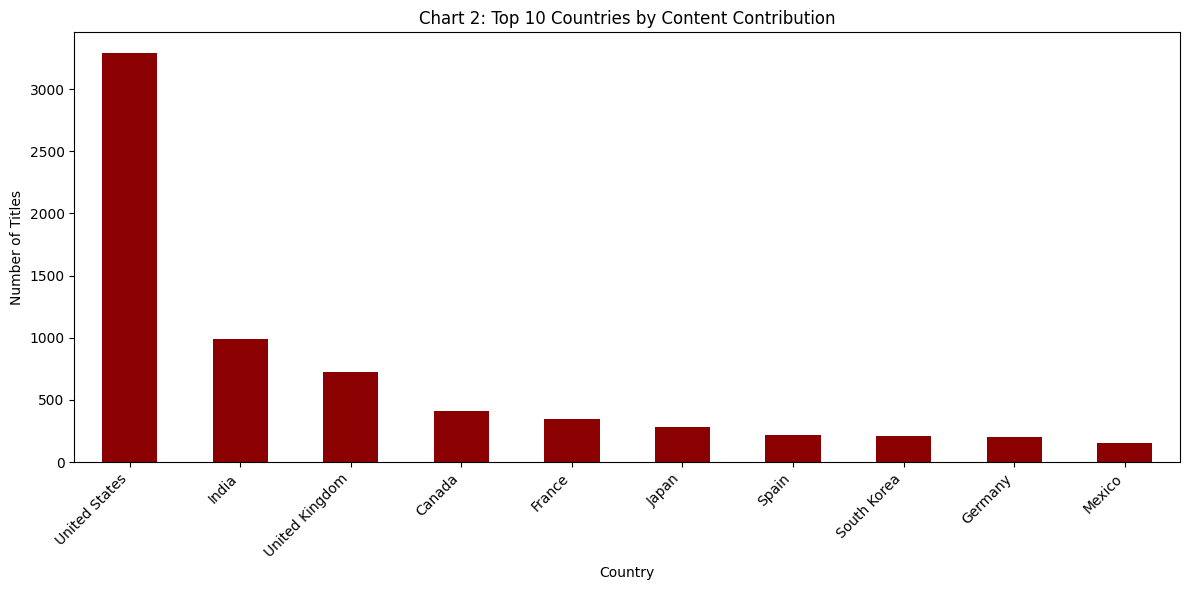

In [6]:
# --- 4. Result 2 (Chart 2): Geographic Analysis (Top 10 Contributing Countries) ---
# Objective: Compare country-wise contributions to Netflix’s catalog.
country_df = df.dropna(subset=['Country']).copy()
# Split multiple countries and count contributions
country_df['Country'] = country_df['Country'].apply(lambda x: [c.strip() for c in x.split(',')])
country_series = country_df.explode('Country')['Country']
country_counts = country_series.value_counts().head(10)

plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='darkred')
plt.title('Chart 2: Top 10 Countries by Content Contribution')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('chart2_top_countries.png')
print("Chart 2: 'chart2_top_countries.png' saved.")

Chart 3: 'chart3_top_genres.png' saved.

--- All 3 required charts generated successfully. ---


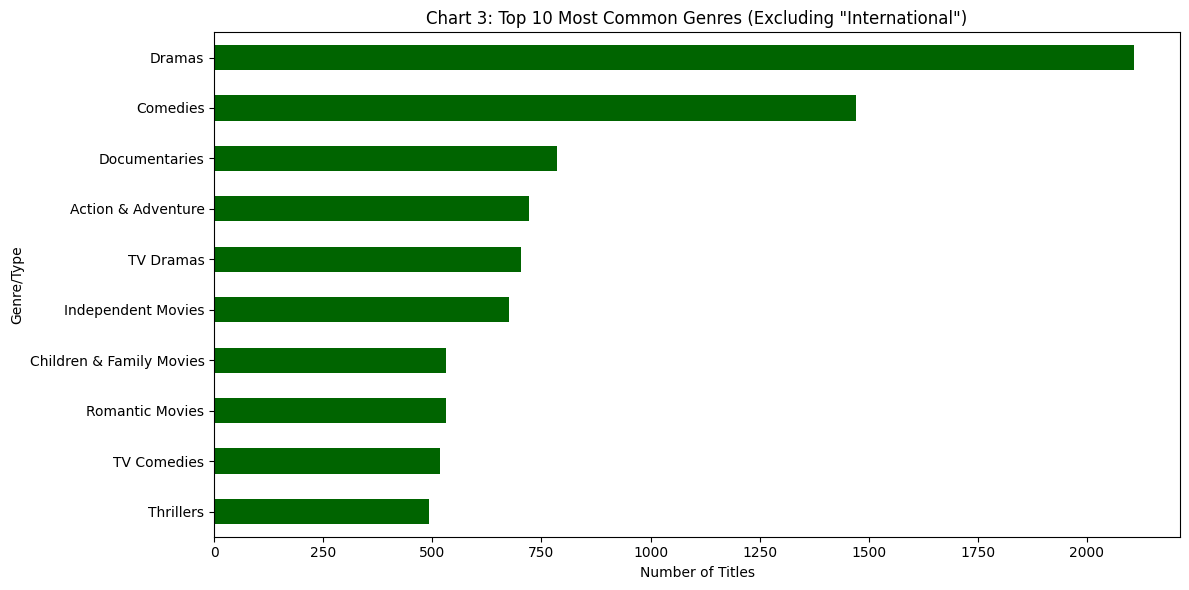

In [7]:
# --- 5. Result 3 (Chart 3): Genre Analysis (Top 10 Genres/Types) ---
# Objective: Identify the most common genres.
type_df = df.copy()
type_df['Type'] = type_df['Type'].apply(lambda x: [t.strip() for t in x.split(',')])
type_series = type_df.explode('Type')['Type']
# Filter out common tags like 'International' for a clearer genre list
type_series = type_series[~type_series.str.contains('International', case=False)]
genre_counts = type_series.value_counts().head(10)

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='barh', color='darkgreen')
plt.title('Chart 3: Top 10 Most Common Genres (Excluding "International")')
plt.xlabel('Number of Titles')
plt.ylabel('Genre/Type')
plt.gca().invert_yaxis() # Display highest count at the top
plt.tight_layout()
plt.savefig('chart3_top_genres.png')
print("Chart 3: 'chart3_top_genres.png' saved.")

print("\n--- All 3 required charts generated successfully. ---")